In [72]:
import pandas as pd

boxes = pd.read_parquet('predictions.parquet')
img_index = pd.read_csv('image_index.csv')

In [73]:
# join on image_id
df = boxes.merge(img_index, on='image_id', how='left')

In [74]:
df['num_people'] = df['image_id'].map(df.groupby('image_id').size())

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['timestamp'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

In [75]:
df['timestamp'].dt.date.unique()
df['hour'] = df['timestamp'].dt.hour

In [76]:
q = df['timestamp'].dt.day_name() == 'Tuesday'
data = df[q]

In [81]:
data.groupby(['location', 'hour'])['num_people'].mean()

location       hour
MC_DHPOS       6       1.000000
               7       1.750000
               8       2.348837
               9       2.630769
               10      2.440000
                         ...   
NH_DHService3  14      1.873563
               15      1.523810
               16      1.000000
               17      1.000000
               18      1.181818
Name: num_people, Length: 292, dtype: float64

/tmp/ipykernel_151943/753615974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['hour'].astype(int)
/tmp/ipykernel_151943/753615974.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_151943/753615974.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_151943/753615974.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

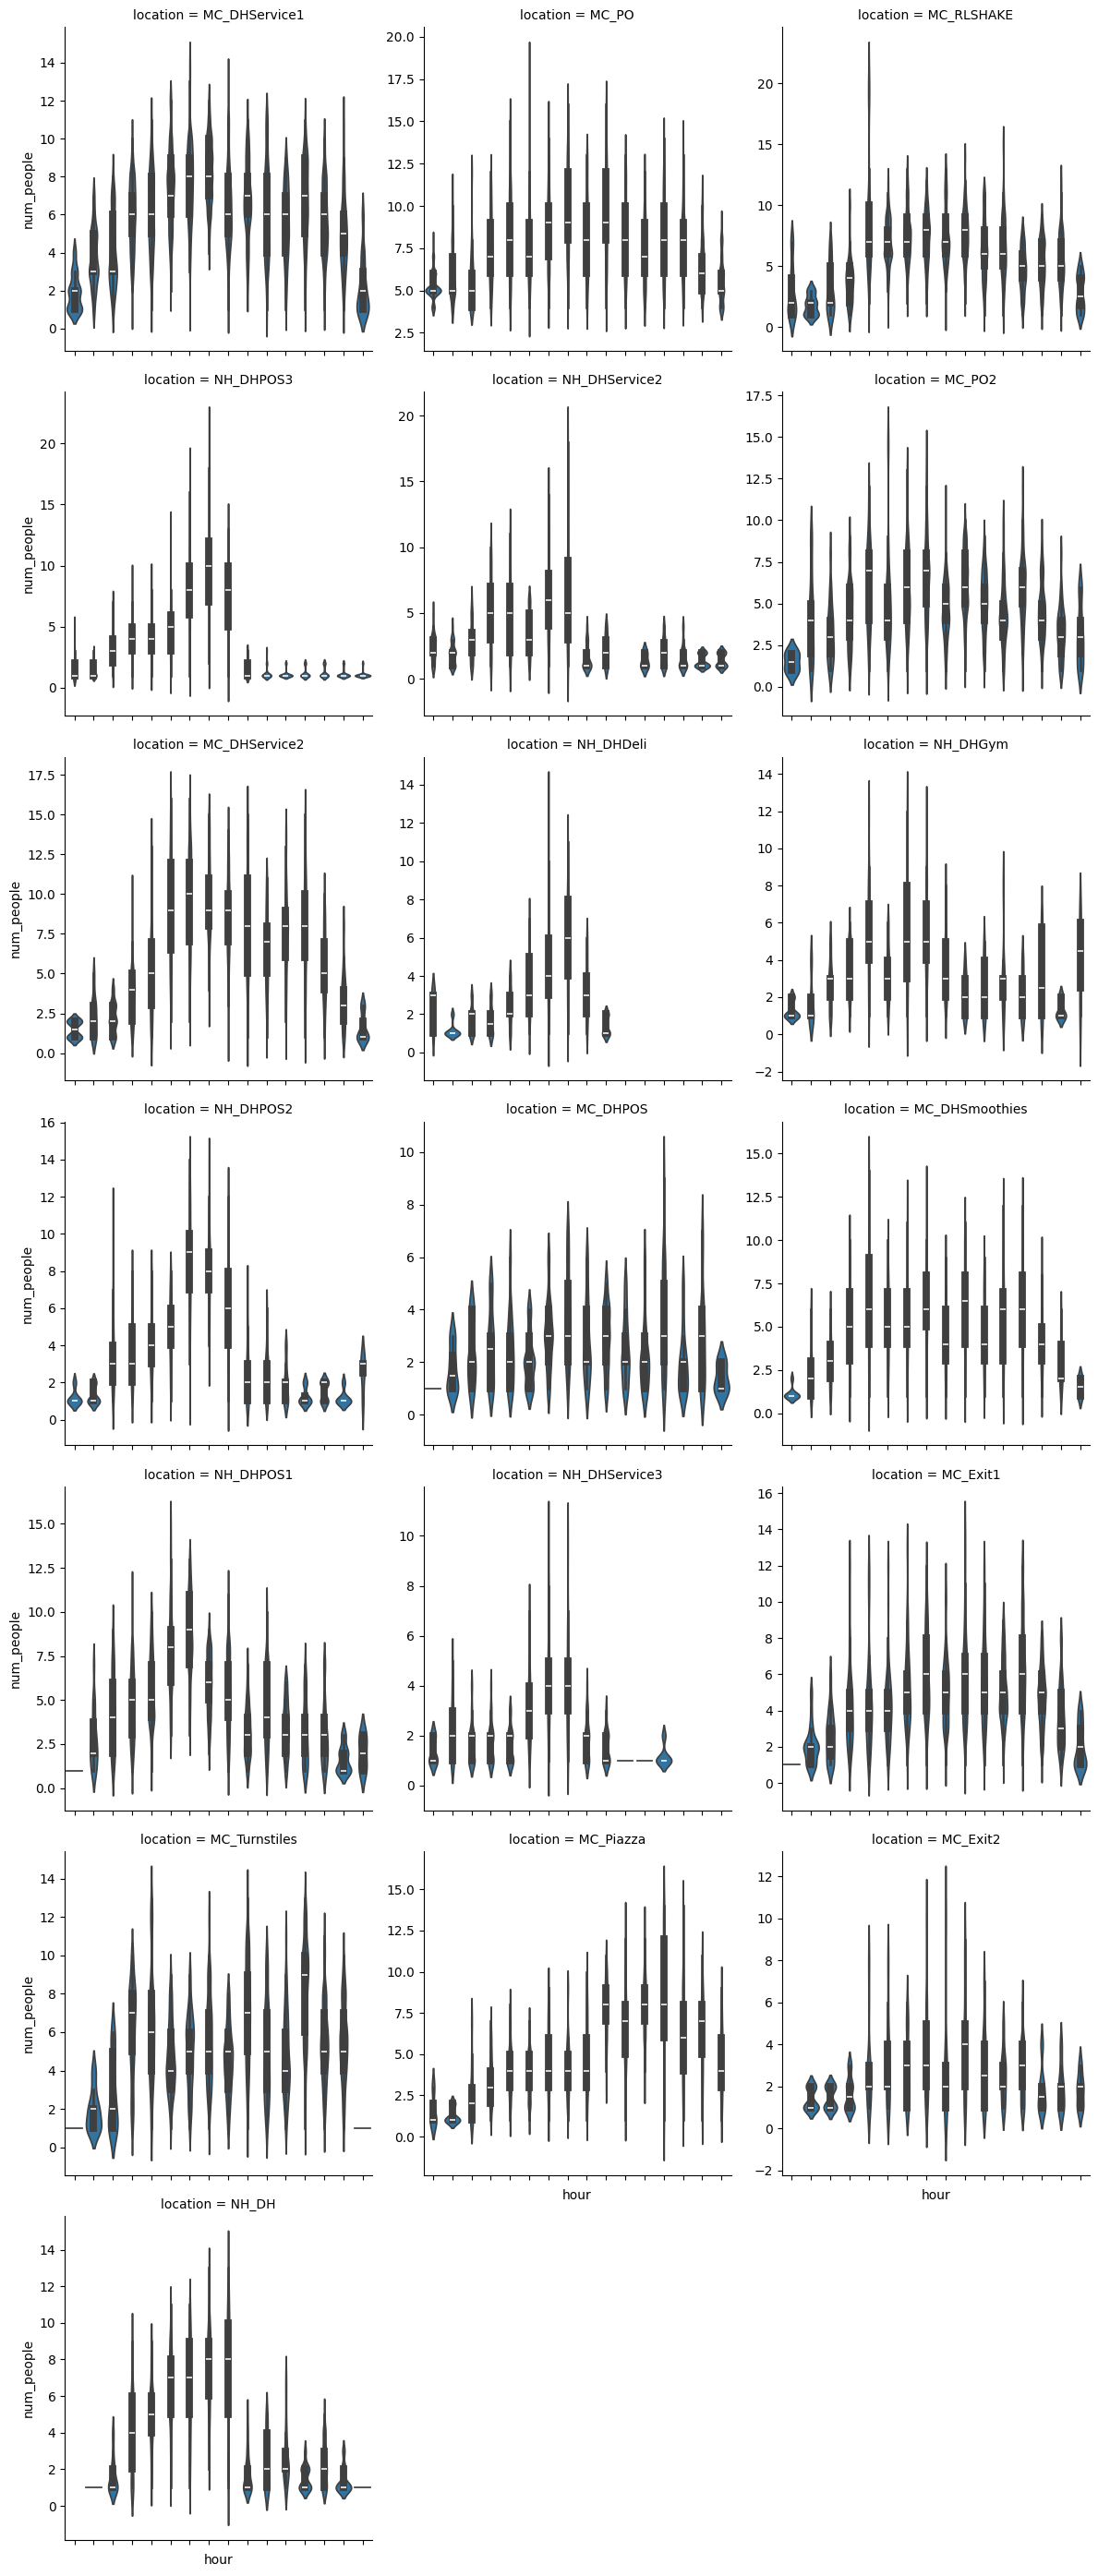

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'hour' is an integer or categorical type for plotting
data['hour'] = data['hour'].astype(int)

# Set up a FacetGrid to plot each location separately
g = sns.FacetGrid(data, col="location", col_wrap=3, height=4, sharey=False)

# Use violinplot to show the distribution of num_people per hour
g.map(sns.violinplot, 'hour', 'num_people', order=sorted(data['hour'].unique()))

# Optional: Adjust labels
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# get hourly traffic for location group
def get_hourly_traffic(g):
    hour = g['timestamp'].dt.hour
    ts = g['timestamp']

    g.groupby(hour).gro

    pass

get_hourly_traffic(df.groupby('location'))

,image_id,x1,y1,x2,y2,confidence,path,date_folder,timestamp,location
0,1745143201_MC_PO,161.500,164.3750,195.000,214.125,0.497070,../image_downloader/images/2025-04-20/17451432...,2025-04-20,2025-04-20 06:00:01-04:00,MC_PO
1,1745143201_MC_PO,142.750,153.2500,165.750,214.250,0.486328,../image_downloader/images/2025-04-20/17451432...,2025-04-20,2025-04-20 06:00:01-04:00,MC_PO
2,1745143201_MC_PO,196.250,168.0000,219.500,215.000,0.465820,../image_downloader/images/2025-04-20/17451432...,2025-04-20,2025-04-20 06:00:01-04:00,MC_PO
3,1745143201_MC_PO,160.750,166.1250,184.750,214.875,0.421631,../image_downloader/images/2025-04-20/17451432...,2025-04-20,2025-04-20 06:00:01-04:00,MC_PO
4,1745143201_MC_PO,219.500,176.0000,256.000,211.500,0.412109,../image_downloader/images/2025-04-20/17451432...,2025-04-20,2025-04-20 06:00:01-04:00,MC_PO
...,...,...,...,...,...,...,...,...,...,...
471200,1745632780_MC_PO,194.250,167.5000,218.750,208.000,0.526367,../image_downloader/images/2025-04-25/17456327...,2025-04-25,2025-04-25 21:59:40-04:00,MC_PO
471201,1745632780_MC_PO,161.375,163.5000,190.375,212.500,0.508789,../image_downloader/images/2025-04-25/17456327...,2025-04-25,2025-04-25 21:59:40-04:00,MC_PO
471202,1745632780_MC_PO,140.250,149.5000,167.500,212.250,0.258301,../image_downloader/images/2025-04-25/17456327...,2025-04-25,2025-04-25 21:59:40-04:00,MC_PO
471203,1745632780_NH_DHPOS3,618.000,28.8750,640.000,112.500,0.481445,../image_downloader/images/2025-04-25/17456327...,2025-04-25,2025-04-25 21:59:40-04:00,NH_DHPOS3
